In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from ydata_profiling import ProfileReport
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import ADASYN, SMOTE
from skopt import BayesSearchCV
from sklearn.metrics import f1_score
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.model_selection import StratifiedShuffleSplit
from skopt.space import Real, Integer, Categorical


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/online-shoppers-prediction-2402-mtl-782/kaggle_test.csv
/kaggle/input/online-shoppers-prediction-2402-mtl-782/kaggle_train.csv


Load training data :

In [2]:
path = "/kaggle/input/online-shoppers-prediction-2402-mtl-782/kaggle_train.csv"
df = pd.read_csv(path, na_values='?')

Drop Duplicates :

In [3]:
df = df.drop_duplicates()


In [4]:
# df["Administrative_timeperpage"] = df.apply(
#     lambda row: 0 if row["Administrative"] == 0 else row["Administrative_Duration"] / row["Administrative"],
#     axis=1
# )
# df["Informational_timeperpage"] = df.apply(
#     lambda row: 0 if row["Informational"] == 0 else row["Informational_Duration"] / row["Informational"],
#     axis=1
# )
# df["ProductRelated_timeperpage"] = df.apply(
#     lambda row: 0 if row["ProductRelated"] == 0 else row["ProductRelated_Duration"] / row["ProductRelated"],
#     axis=1
# )

Drop correated columns :

In [5]:
features_to_remove = ["Administrative_Duration", "Informational", "ProductRelated_Duration"]
df = df.drop(features_to_remove, axis = 1)

In [6]:
categorical_features = ["OperatingSystems", "Browser", "Region", "TrafficType", "VisitorType", "Weekend", "Month"]
# numerical_features = ["Administrative", "Administrative_timeperpage", "Informational_Duration","Informational_timeperpage", "ProductRelated", "ProductRelated_timeperpage", "BounceRates", "ExitRates", "PageValues", "SpecialDay"]
numerical_features = ["Administrative", "Informational_Duration", "ProductRelated", "BounceRates", "ExitRates", "PageValues", "SpecialDay"]
# numerical_features = ["Administrative", "Administrative_Duration", "Informational", "Informational_Duration", "ProductRelated","ProductRelated_Duration", "BounceRates", "ExitRates", "PageValues", "SpecialDay"]

In [7]:
def label(val):
    if (val == True):
        return 1
    return 0
y = df["Revenue"]
y = y.apply(label)
X = df.drop(columns = ["Revenue"])

In [8]:
OH_encoder = OneHotEncoder(drop = 'first', handle_unknown='ignore', sparse_output=False)
OH_cols = pd.DataFrame(OH_encoder.fit_transform(X[categorical_features]), columns=OH_encoder.get_feature_names_out())
OH_cols.index = X.index

In [9]:
Z_scaler = StandardScaler()
Z_scaled_cols = pd.DataFrame(Z_scaler.fit_transform(X[numerical_features]), columns = numerical_features)
Z_scaled_cols.index = X.index
X = pd.concat([OH_cols, Z_scaled_cols], axis = 1)
# X.head()

ADASYN:

In [10]:
# adasyn = ADASYN(sampling_strategy=0.45, random_state = 1)
# X, y = adasyn.fit_resample(X, y)
# smote=SMOTE(sampling_strategy=0.47, random_state = 1) 
# X,y=smote.fit_resample(X,y)
# X.head()

In [11]:
# # # base_models = [ #ada 0.49
# # #     ('rf', RandomForestClassifier(
# # #         criterion='gini',
# # #         max_depth=20,
# # #         max_features='auto',
# # #         min_samples_leaf=1,
# # #         min_samples_split=2,
# # #         n_estimators=300,
# # #         random_state=42
# # #     )),
# # #     ('dt', DecisionTreeClassifier(
# # #         criterion='gini',
# # #         max_depth=1,
# # #         min_samples_leaf=1,
# # #         min_samples_split=7,
# # #         random_state=42
# # #     )),
# # #     ('xgb', XGBClassifier(
# # #         colsample_bytree=1.0,
# # #         learning_rate=0.0700264447953816,
# # #         max_depth=10,
# # #         n_estimators=334,
# # #         subsample=0.5,
# # #         use_label_encoder=False,
# # #         eval_metric='logloss',
# # #         random_state=42
# # #     ))
# # # ]

# test_path = "/kaggle/input/online-shoppers-prediction-2402-mtl-782/kaggle_test.csv"
# X_test = pd.read_csv(test_path)
# id = X_test.id
# X_test = X_test.drop(columns=["id"])

# X_test = X_test.drop(features_to_remove, axis = 1)
# OH_cols = pd.DataFrame(OH_encoder.transform(X_test[categorical_features]), columns=OH_encoder.get_feature_names_out())
# OH_cols.index = X_test.index
# X_test = pd.concat([X_test.drop(columns=categorical_features), OH_cols], axis = 1)

# Z_scaled_cols = pd.DataFrame(Z_scaler.transform(X_test[numerical_features]), columns = numerical_features)
# Z_scaled_cols.index = X_test.index
# X_test = pd.concat([X_test.drop(columns= numerical_features), Z_scaled_cols], axis = 1)

# base_model_test_predictions = pd.DataFrame()


# base_models = [
#     ('xgb', XGBClassifier(
#          colsample_bytree=0.8421420062340929,
#          learning_rate=0.031201547926466046,
#          max_depth=3,
#          n_estimators=249,
#          subsample=1.0,
#          use_label_encoder=False,
#          # eval_metric='logloss',
#          random_state=42
#     )),
#     ('dt', DecisionTreeClassifier(
#          criterion='gini',
#          max_depth=1,
#          min_samples_leaf=1,
#          min_samples_split=7,
#          random_state=42
#     )),
#     ('adb', AdaBoostClassifier(
#          learning_rate=0.02809367595717782,
#          n_estimators=3,
#          random_state=42
#     )),
#     ('rf', RandomForestClassifier(
#          criterion='entropy',
#          max_depth=None,
#          max_features='auto',
#          min_samples_leaf=1,
#          min_samples_split=8,
#          n_estimators=300,
#          random_state=42
#     )),
#     ('svm_lin', SVC(
#          kernel = 'linear', C = 150, random_state=42, class_weight='balanced', probability=True
#     ))
#     ('svm_rbf', SVC(
#         kernel = 'rbf', 'C'= 6.985988902587575, 'gamma'= 0.02944105776659468, class_weight='balanced', probability=True
#     ))
# ]


# # Initialize variables
# base_model_predictions = pd.DataFrame()

# for model_name, model in base_models:
#     print(f"Training model: {model_name}")
    
#     # Train the model
#     model.fit(X, y)
    
#     # Predict probabilities (use positive class probabilities)
#     base_model_predictions[model_name] = model.predict(X)
#     base_model_test_predictions[model_name] = model.predict(X_test)


# # Combine all base model predictions and the target


# # Define search space for logistic regression meta-model
# param_space = {
#     # Group 1: For L2 penalty
#     {
#         'penalty': Categorical(['l2']),
#         'solver': Categorical(['lbfgs', 'liblinear', 'saga']),
#         'C': Real(0.001, 100, prior='log-uniform'),
#         'tol': Real(1e-5, 1e-3, prior='log-uniform')
#     },
#     # Group 2: For no penalty (penalty='none')
#     {
#         'penalty': Categorical(['none']),
#         'solver': Categorical(['lbfgs', 'saga', 'newton-cg']),  # Adjusted solvers
#         'tol': Real(1e-5, 1e-3, prior='log-uniform')
#     }
    
#     # 'max_depth': Integer(1, 50),             # Maximum depth of the tree
#     # 'min_samples_split': Integer(2, 20),       # Minimum number of samples required to split an internal node
#     # 'min_samples_leaf': Integer(1, 20),        # Minimum number of samples required to be at a leaf node
#     # 'criterion': Categorical(['gini', 'entropy'])
# }


# bayes_cv = BayesSearchCV(
#     estimator=LogisticRegression(random_state=42, max_iter=1000, class_weight="balanced"),
#     search_spaces=param_space,
#     n_iter=50,
#     scoring='f1',
#     cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42), 
#     n_jobs=-1,  
#     random_state=1,
#     verbose=4
# )

In [12]:
rf = RandomForestClassifier(random_state=42, class_weight="balanced")

param_space = {
    'n_estimators': Integer(1, 300),             
    'max_depth': Integer(1, 20),                  
    'min_samples_split': Integer(2, 20),          
    'min_samples_leaf': Integer(1, 20),           
    'max_features': Categorical(['auto', 'sqrt', 'log2']),
    'criterion': Categorical(['gini', 'entropy'])   
}

bayes_cv = BayesSearchCV(
    estimator=rf,
    search_spaces=param_space,
    n_iter=50, 
    scoring='f1',
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42), 
    n_jobs=-1,  
    random_state=1,
    verbose=4
)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best Parameters: OrderedDict([('criterion', 'gini'), ('max_depth', 20), ('max_features', 'auto'), ('min_samples_leaf', 6), ('min_samples_split', 2), ('n_estimators', 296)])


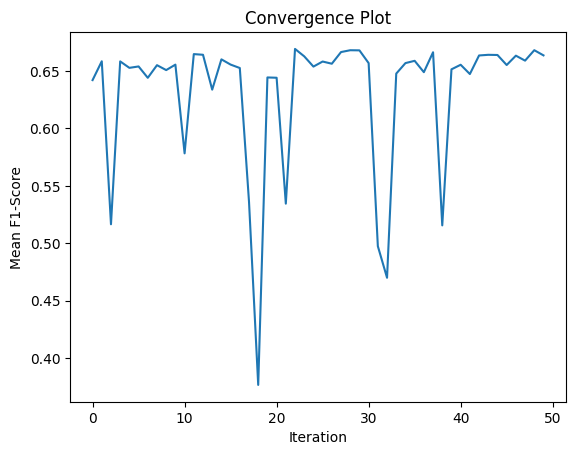

In [13]:
bayes_cv.fit(X, y)
print("Best Parameters:", bayes_cv.best_params_)
import matplotlib.pyplot as plt
plt.plot(bayes_cv.cv_results_['mean_test_score'])
plt.xlabel('Iteration')
plt.ylabel('Mean F1-Score')
plt.title('Convergence Plot')
plt.show()

In [14]:
test_path = "/kaggle/input/online-shoppers-prediction-2402-mtl-782/kaggle_test.csv"
X_test = pd.read_csv(test_path)
print(X_test.head())
X_test.describe()
id = X_test.id
X_test = X_test.drop(columns=["id"])
# X_test["Administrative_timeperpage"] = X_test.apply(
#     lambda row: 0 if row["Administrative_Duration"] == 0 else row["Administrative"] / row["Administrative_Duration"],
#     axis=1
# )
# X_test["Informational_timeperpage"] = X_test.apply(
#     lambda row: 0 if row["Informational_Duration"] == 0 else row["Informational"] / row["Informational_Duration"],
#     axis=1
# )
# X_test["ProductRelated_timeperpage"] = X_test.apply(
#     lambda row: 0 if row["ProductRelated_Duration"] == 0 else row["ProductRelated"] / row["ProductRelated_Duration"],
#     axis=1
# )

   id  Administrative  Administrative_Duration  Informational  \
0   0               3               142.500000              0   
1   1               6               437.391304              2   
2   2               1                41.125000              0   
3   3               2               141.000000              0   
4   4              18               608.140000              6   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                    0.00              48              1052.255952   
1                  235.55              83              2503.881781   
2                    0.00             126              4310.004668   
3                    0.00              10               606.666667   
4                  733.80             168              4948.398759   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0     0.004348   0.013043    0.000000         0.0   Nov                 1   
1     0.002198   0.004916    2.086

In [15]:
X_test = X_test.drop(features_to_remove, axis = 1)
OH_cols = pd.DataFrame(OH_encoder.transform(X_test[categorical_features]), columns=OH_encoder.get_feature_names_out())
OH_cols.index = X_test.index
X_test = pd.concat([X_test.drop(columns=categorical_features), OH_cols], axis = 1)

Z_scaled_cols = pd.DataFrame(Z_scaler.transform(X_test[numerical_features]), columns = numerical_features)
Z_scaled_cols.index = X_test.index
X_test = pd.concat([X_test.drop(columns= numerical_features), Z_scaled_cols], axis = 1)

In [16]:
y_pred = bayes_cv.predict(X_test)
# y_pred = bayes_cv.predict(base_model_test_predictions)

In [17]:
results_df = pd.DataFrame({
    'id': id,  
    'Revenue': y_pred  
})
results_df.to_csv('submission.csv', index=False) 